Download kaggle data in Google Colab : 

Link : https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store/version/8

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kareemdesouky","key":"165e4bc1f98904dab3bf653f7ca401fc"}'}

In [ ]:
#  Make directory named kaggle and copy kaggle.json file there.
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18465  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11144  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5696  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3936  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
! kaggle datasets download mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.29G/4.29G [01:19<00:00, 50.6MB/s]
100% 4.29G/4.29G [01:19<00:00, 58.0MB/s]


In [ ]:
! unzip /content/ecommerce-behavior-data-from-multi-category-store.zip

Archive:  /content/ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!gdown --id 1Nan8X33H8xrXS5XhCKZmSpClFTCJsSpE

Permission denied: https://drive.google.com/uc?id=1Nan8X33H8xrXS5XhCKZmSpClFTCJsSpE
Maybe you need to change permission over 'Anyone with the link'?


i cannot download the file because it's only view permission

In [ ]:
# !wget https://drive.google.com/file/d/1qZIwMbMgMmgDC5EoMdJ8aI9lQPsWA3-P/view?usp=sharing

Read datasets :

In [ ]:
!pip install squarify

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify

In [ ]:
data_oct = pd.read_csv('2019-Oct.csv',usecols=['event_time','event_type','price','brand','user_id','user_session'])
data_nov = pd.read_csv('2019-Nov.csv',usecols=['event_time','event_type','price','brand','user_id','user_session'])

In [ ]:
data_oct.head()

,event_time,event_type,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [ ]:
data_nov.head()

,event_time,event_type,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [ ]:
data_nov.shape

(67501979, 6)

In [ ]:
# data_dec = pd.read_csv('https://drive.google.com/drive/folders/1Nan8X33H8xrXS5XhCKZmSpClFTCJsSpE',usecols=['event_time','event_type','price','brand','user_id','user_session'])

In [ ]:
data_oct['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [ ]:
data_nov['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

Column event type have view, cart, and purchase but we only need purchase data

In [ ]:
data_oct_pur = data_oct.loc[data_oct.event_type == 'purchase']
data_nov_pur = data_nov.loc[data_nov.event_type == 'purchase']

In [ ]:
data_oct_pur.shape

(742849, 6)

concatenate October and November data

In [ ]:
data = pd.concat([data_oct_pur , data_nov_pur])

In [ ]:
data.shape

(1659788, 6)

In [ ]:
data.head(2)

,event_time,event_type,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659788 entries, 162 to 67501944
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_time    1659788 non-null  object 
 1   event_type    1659788 non-null  object 
 2   brand         1528121 non-null  object 
 3   price         1659788 non-null  float64
 4   user_id       1659788 non-null  int64  
 5   user_session  1659788 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 88.6+ MB


In [ ]:
data['event_time'] = pd.to_datetime(data['event_time']).dt.tz_convert(None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659788 entries, 162 to 67501944
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   event_time    1659788 non-null  datetime64[ns]
 1   event_type    1659788 non-null  object        
 2   brand         1528121 non-null  object        
 3   price         1659788 non-null  float64       
 4   user_id       1659788 non-null  int64         
 5   user_session  1659788 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 88.6+ MB


In [ ]:
data_no_brand = data.drop(['brand'], axis = 1)

In [ ]:
data_no_brand.dtypes

event_time      datetime64[ns]
event_type              object
price                  float64
user_id                  int64
user_session            object
dtype: object

Each session is equal to 1 transaction in terms of sessions being multiples with every product sold so we need to merge every session together

In [ ]:
data_mr_se = data_no_brand.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)

In [ ]:
data_mr_se.head()

,Date_order,user_id,Quantity,money_spent
0,2019-10-06 11:34:30,546521725,1,289.52
1,2019-10-25 08:39:11,560486342,1,171.90
2,2019-11-02 08:35:35,563180871,1,123.55
3,2019-11-11 03:35:34,566954797,1,151.61
4,2019-10-17 13:37:59,560744406,2,379.78


#RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.[1]

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

Recency = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1

Frequency = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1

Monetary = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Making the 3 attribute Recency, Frequency, and Monetary

In [ ]:
data_mr_se['Date_order'].max()

Timestamp('2019-11-30 23:59:44')

The last date we have is 2019-11-30 so we will use date 2019-12-1 as reference

In [ ]:
import datetime as dt
study_date = dt.datetime(2019,12,1)
data_st_date = pd.DataFrame(data_mr_se)
data_st_date['last_purchase']=study_date - data_st_date['Date_order']
data_st_date['last_purchase'].astype('timedelta64[D]')
data_st_date['last_purchase']=data_st_date['last_purchase'] / np.timedelta64(1, 'D')
data_st_date.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-06 11:34:30,546521725,1,289.52,55.517708
1,2019-10-25 08:39:11,560486342,1,171.90,36.639456
2,2019-11-02 08:35:35,563180871,1,123.55,28.641956
3,2019-11-11 03:35:34,566954797,1,151.61,19.850301
4,2019-10-17 13:37:59,560744406,2,379.78,44.431956


In [ ]:
#Calculate Recency, Frequency, and Monetary of the data
RFM = data_st_date.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))

In [ ]:
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
138340325,19.758866,1,93.50
225644257,18.819780,1,40.91
253299396,24.546169,1,246.85
256164170,10.651921,1,113.23
264649825,55.141539,2,1240.04


Frequency attribute answers the question: How often do they purchase?

In [ ]:
RFM['Frequency'].describe()

count    697470.000000
mean          2.011209
std           2.979720
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         328.000000
Name: Frequency, dtype: float64

Monetary attribute answers the question: How much do they spend overtime?

In [ ]:
RFM['Recency'].describe()

count    697470.000000
mean         25.094585
std          17.223048
min           0.000185
25%          12.871965
50%          20.587141
75%          39.693811
max          60.995810
Name: Recency, dtype: float64

#RFM segmentation :
is a useful tool for identifying groups of clients who should be given extra attention. RFM segmentation enables marketers to target specific groups of customers with communications that are far more relevant to their unique behaviors, resulting in improved response rates, enhanced loyalty, and increased customer lifetime value. RFM segmentation is a method for segmenting data, just like other approaches.

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers

In [ ]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,12.871965,1.0,118.38
0.50,20.587141,1.0,257.15
0.75,39.693811,2.0,669.23


In [ ]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()

In [ ]:
from pprint import pprint
pprint(quartiles)

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 118.38, 0.5: 257.15, 0.75: 669.23},
 'Recency': {0.25: 12.871964699074075,
             0.5: 20.587141203703705,
             0.75: 39.69381076388889}}


#Creation of RFM Segments

In [ ]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    
    

In [ ]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)

In [ ]:
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10
225644257,18.819780,1,40.91,2,4,4,244,10
253299396,24.546169,1,246.85,3,4,3,343,10
256164170,10.651921,1,113.23,1,4,4,144,9
264649825,55.141539,2,1240.04,4,2,1,421,7


In [ ]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'

In [ ]:
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)

In [ ]:
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10,Lost
225644257,18.819780,1,40.91,2,4,4,244,10,Lost
253299396,24.546169,1,246.85,3,4,3,343,10,Lost
256164170,10.651921,1,113.23,1,4,4,144,9,Hibernating
264649825,55.141539,2,1240.04,4,2,1,421,7,About To Sleep


How many customers do we have in each segment?

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

In [ ]:
RFM_desc.head()

Recency Frequency Monetary        
                   mean      mean     mean   count
RFM_label                                         
About To Sleep     20.5       1.7    628.8   71309
Can’t Lose Them    19.9       1.3    406.9   90809
Champions           5.1       7.9   3777.5   37405
Hibernating        22.5       1.1    309.2  114053
Lost               38.6       1.0    141.1  231538

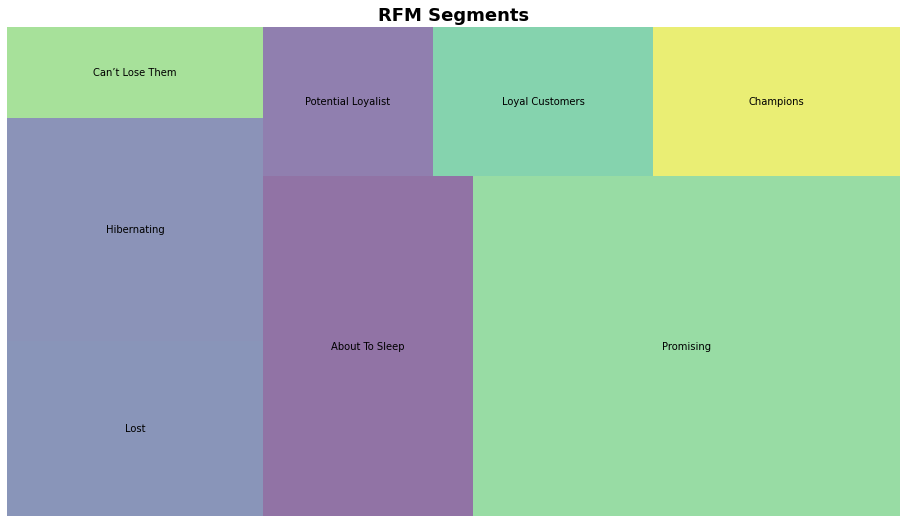

In [ ]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()